# 5.4 Exercises - Solutions
## Polytomous IRT
This week, we will do some exercises on Item Response Theory with polytomous data.

## 1️⃣ RSM Model Comparison
**Instructions:**
1. Fit a new RSM model (`fitrsm3`) using the original `itceaq` data (including items 10 and 15).
2. Compare the item fit statistics (`ifit3`) of `fitrsm3` to those of `fitrsm2` (the model without items 10 and 15). Are there any noticeable differences?
3. Conduct Andersen's LR-test on `fitrsm3` using the `gradevec` splitting criterion. Does the model fit improve or worsen compared to `fitrsm2`?

In [ ]:
# Import packages
import numpy as np
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Fit the model
ro.r("fitrsm3 <- RSM(itceaq)")

# Get person parameters
ppar3 = ro.r("ppar3 <- person.parameter(fitrsm3)")

# Get item fit
ifit03 = ro.r("itemfit(ppar3)")
print(ifit03)

ro.r("imp2 <- mice(CEAQ)")
ro.r("gradevec2 <- complete(imp2)$grade")

ro.r('levels(gradevec2) <- c("grade56", "grade56", "grade78", "grade78")')

LRtest2 = ro.r("LRtest(fitrsm3, gradevec2)")
print(LRtest2)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  210.938 205   0.373      1.024     0.918    0.201  -0.704   0.504
ceaq2  190.205 205   0.763      0.923     0.897   -0.496  -0.977   0.549
ceaq3  259.718 205   0.006      1.261     0.966    1.305  -0.215   0.396
ceaq4  222.146 205   0.196      1.078     0.995    0.724  -0.024   0.289
ceaq5  167.622 205   0.974      0.814     0.864   -1.576  -1.471   0.511
ceaq6  191.085 205   0.749      0.928     0.914   -0.764  -1.055   0.407
ceaq7  162.424 205   0.987      0.788     0.886   -1.506  -1.074   0.588
ceaq8  146.463 205   0.999      0.711     0.738   -3.409  -3.523   0.622
ceaq9  181.586 205   0.879      0.881     0.891   -1.311  -1.373   0.512
ceaq10 380.868 205   0.000      1.849     1.650    3.959   4.549  -0.044
ceaq11 149.579 205   0.999      0.726     0.753   -3.297  -3.342   0.635
ceaq12 192.132 205   0.731      0.933     0.980   -0.424  -0.151   0.589
ceaq13 188.073 205   0.796   

## 2️⃣ Exercise PCM Item Difficulty Comparison
**Instructions:**
1. Extract the item location parameters (difficulty) from the `fitpcm` model.
2. Identify the two items with the highest and lowest difficulty parameters.
3. Plot the item characteristic curves (`ICCs`) for these two items on the same graph.
4. Interpret the plot. How do the `ICCs` reflect the difference in difficulty between the two items?

In [ ]:
# Import packages
import numpy as np
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract PG items
PGitems = ASTI.iloc[:, [10, 13, 14, 16, 17, 22]]

# Inspect the dataset
print(PGitems.head())

# Put data back into R
ro.globalenv['PGitems'] = PGitems


ro.r('fitpcm <- PCM(PGitems)')
thresh = ro.r("thresholds(fitpcm)")
print(thresh) # Item ASTI23 & ASTI14 (highest & lowest threshold 2)

   ASTI11  ASTI14  ASTI15  ASTI17  ASTI18  ASTI23
1     2.0     2.0     1.0     0.0     1.0     2.0
2     2.0     3.0     2.0     2.0     2.0     1.0
3     1.0     2.0     1.0     2.0     2.0     2.0
4     1.0     1.0     2.0     0.0     3.0     2.0
5     0.0     0.0     1.0     1.0     2.0     2.0

Design Matrix Block 1:
       Location Threshold 1 Threshold 2 Threshold 3
ASTI11 -0.25342    -0.95748     0.45065          NA
ASTI14  0.55114    -0.36856     0.14314     1.87882
ASTI15 -0.23452    -1.10152     0.63248          NA
ASTI17  0.36189    -0.03309     0.75686          NA
ASTI18  0.60182    -0.60759     0.53785     1.87519
ASTI23  0.26095    -0.36529     0.88720          NA




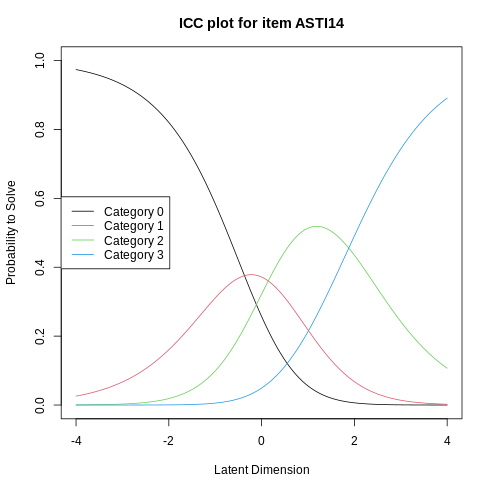

In [ ]:
#TODO Plot ICCs in R
%%R
plotICC(fitpcm, item.subset = 2)

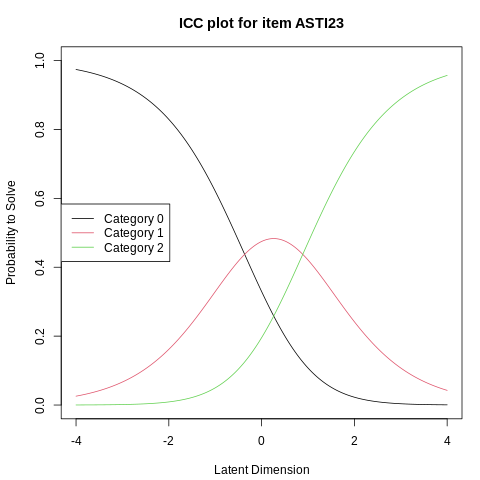

In [ ]:
%%R
plotICC(fitpcm, item.subset = 6)

## 3️⃣ GPCM Discrimination Exploration
**Instructions:**
1. Extract the item discrimination parameters (`disc`) from the `stgpcm` model.
2. Identify the item with the highest discrimination parameter.
3. Identify the item with the worst discrimination paramenter.
4. Plot the two item and compare them.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract ST items
STitems = ASTI.iloc[:, [1,3,6,12,15,23,24]]

# Inspect the dataset
print(STitems.head())

# Put data back into R
ro.globalenv['STitems'] = STitems

# Fit the model
ro.r('stgpcm <- gpcm(STitems)') #GPCM

# Extract discrimination parameters
coeffs = ro.r('stgpcm$coef')
print(coeffs)

# If we don't want to select the maximum and minimum by hand:
# Convert R list to Python dictionary
coeffs_dict = {key: list(value) for key, value in zip(coeffs.names, coeffs)}

# Extract last value of each discrimination parameter
disc_para = pd.DataFrame({'disc': [values[-1] for values in coeffs_dict.values()]})

# Display the final DataFrame
print(disc_para)

# Find max and min discrimination values
max_disc = disc_para.loc[disc_para['disc'].idxmax()]
min_disc = disc_para.loc[disc_para['disc'].idxmin()]

# Print results
print("Max Discrimination Parameter:")
print(max_disc)

print("\nMin Discrimination Parameter:")
print(min_disc)

   ASTI2  ASTI4  ASTI7  ASTI13  ASTI16  ASTI24  ASTI25
1    2.0    3.0    2.0     2.0     3.0     0.0     2.0
2    2.0    2.0    2.0     2.0     2.0     1.0     1.0
3    1.0    1.0    0.0     2.0     1.0     1.0     2.0
4    2.0    3.0    2.0     2.0     3.0     0.0     1.0
5    3.0    3.0    3.0     2.0     3.0     1.0     0.0
$ASTI2
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-1.3374681 -0.3841643  1.0106892  2.2824796 

$ASTI4
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-3.1293782 -1.1749336  2.4453829  0.4520975 

$ASTI7
    Catgr.1     Catgr.2     Catgr.3      Dscrmn 
-0.99931831 -0.03769178  1.17269927  2.77475284 

$ASTI13
   Catgr.1    Catgr.2     Dscrmn 
-3.8623654 -0.4040226  0.2307232 

$ASTI16
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-2.6819202 -0.4040134  2.3897500  0.4344583 

$ASTI24
   Catgr.1    Catgr.2     Dscrmn 
-1.3975288  3.6983803  0.2833939 

$ASTI25
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-2.8231661 -0.1662263  3.0660488  0.3704399 


       disc
0  

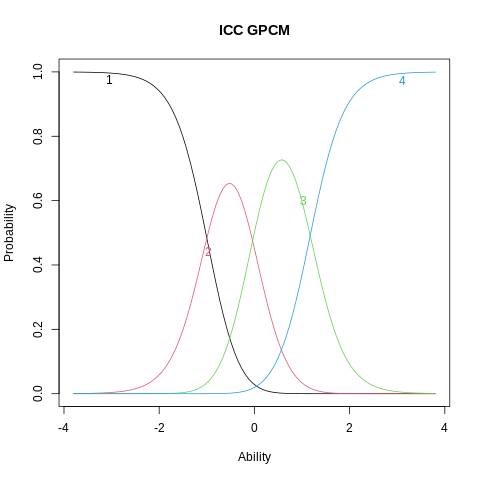

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items =3) # maximum dscm parameter. Watchout: R starts counting at 1

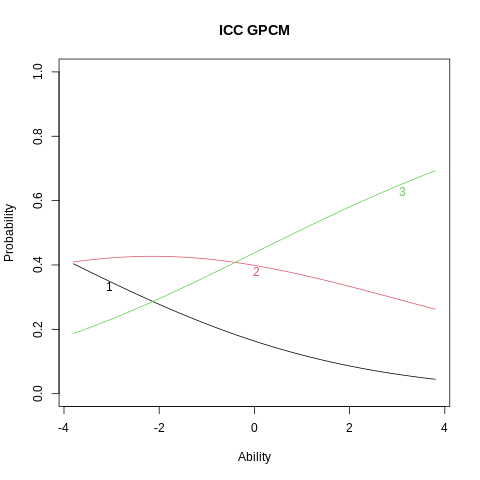

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items = 4) # minimum dscm parameter. Watchout: R starts counting at 1